In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import seaborn as sns

print('import modules successfully')

import modules successfully


# Task 1 - Data preparation
### 1. Show the distribution of data in two classes


In [2]:
# Task 1: Data preparation
df_test = pd.read_csv("data_set_ALL_AML_independent.csv")
df_train = pd.read_csv("data_set_ALL_AML_train.csv")
df_actual = pd.read_csv("actual.csv")

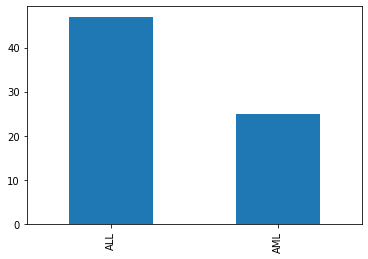

In [3]:
df_actual['cancer'].value_counts().plot(kind='bar');

### 2. Encode the labels

In [4]:
# import sklearn module
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_actual["cancer"] = encoder.fit_transform(df_actual["cancer"])
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   patient  72 non-null     int64
 1   cancer   72 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


### 3. Remove all the 'call' column from train and test set

In [5]:
# removing all the call columns from train dataframe
arr_train_header = list(df_train.columns)
for i in range(len(arr_train_header)):
    if 'call' in arr_train_header[i]:
        df_train = df_train.drop(arr_train_header[i], axis=1)
# removing two first columns ["Gene Description", "Gene Accession Number"]
df_train = df_train.iloc[:, 2:]

In [6]:
df_train = df_train.reindex(natsorted(df_train.columns), axis=1)
df_train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38'],
      dtype='object')

In [7]:
df_train = df_train.T
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [8]:
# removing all the call columns from test dataframe
arr_test_header = list(df_test.columns)
for i in range(len(arr_test_header)):
    if 'call' in arr_test_header[i]:
        df_test = df_test.drop(arr_test_header[i], axis=1)
# removing two first columns ["Gene Description", "Gene Accession Number"]
df_test = df_test.iloc[:, 2:]

In [9]:
df_test = df_test.reindex(natsorted(df_test.columns), axis=1)
df_test.columns

Index(['39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72'],
      dtype='object')

In [10]:
df_test = df_test.T
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [11]:
df_train.shape

(38, 7129)

In [12]:
df_test.shape

(34, 7129)

In [13]:
frames = [df_train, df_test]
df_combined = pd.concat(frames)
df_combined.shape

(72, 7129)

In [14]:
for row in df_combined.index:
    print(row, end = " ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 

In [15]:
cancer_col = df_actual.iloc[:, 1]
df_combined = df_combined.reset_index(drop = True)
cancer_col = cancer_col.reset_index(drop = True)
frames = [df_combined, cancer_col]
df_combined = pd.concat(frames, axis = 1)
df_combined.shape

(72, 7130)

In [16]:
df_combined.tail()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,0
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,0
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,0
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,0
71,-131,-126,-50,211,-206,-287,-34,-114,62,341,...,697,3,1046,27,874,393,34,237,-2,0
